In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
import matplotlib.pyplot as plt
import os
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import folium
from pandas.io.json import json_normalize

In [2]:
HTML_df = pd.read_html("http://www.tamilselvi.com/List-of-Corporation-wards-in-Chennai.html") 
Chennai_Areas_df = HTML_df[2] 
Chennai_Areas_df = Chennai_Areas_df[['Ward No.','Ward Name']]
Chennai_Areas_df = Chennai_Areas_df.iloc[1:154]
Chennai_Areas_df = Chennai_Areas_df.dropna(axis=0)
Chennai_Areas_df.head()

,Ward No.,Ward Name
1,1,Kodungaiyur (West)
2,2,Kodungaiyur (East)
3,3,Dr.Radhakrishnan Nagar (North)
4,4,Cheriyan Nagar (North)
5,5,Jeeva Nagar (North)


In [3]:
Population_df = pd.read_excel('Population.xls', index_col=0)  
Population_df.head()


,District Code,Tahsil/ Sub-District Code,Town/ Village Code,Ward Code,Enumeration Block Code,Level,Name,Total/ Rural/ Urban,Total - Persons,Total - Males,Total - Females,Scheduled Caste - Persons,Scheduled Caste - Males,Scheduled Caste - Females,Scheduled Tribe - Persons,Scheduled Tribe - Males,Scheduled Tribe - Females
State Code,,,,,,,,,,,,,,,,,
33,2,0,0,0,0,DISTRICT,Chennai,Total,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,0,0,0,DISTRICT,Chennai,Rural,0,0,0,0,0,0,0,0,0
33,2,0,0,0,0,DISTRICT,Chennai,Urban,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,40201000,0,0,TOWN,Chennai (M Corp.),Urban,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,40201000,1,0,WARD,Chennai (M Corp.) - Ward No.1,Urban,57723,29449,28274,4477,2271,2206,46,21,25


In [4]:
Pop_df=Population_df[['Ward Code','Total - Persons']]
Pop_df

,Ward Code,Total - Persons
State Code,,
33,0,4343645
33,0,0
33,0,4343645
33,0,4343645
33,1,57723
...,...,...
33,151,38366
33,152,24555
33,153,95818


In [5]:
Chennai_Areas_df['Ward No.']

1        1
2        2
3        3
4        4
5        5
      ... 
148    140
149    141
151    142
152    143
153    144
Name: Ward No., Length: 144, dtype: object

In [6]:
Chennai_Areas_df['Ward No.'] = Chennai_Areas_df['Ward No.'].astype(int)
Chennai_Areas_df.dtypes

Ward No.      int32
Ward Name    object
dtype: object

In [7]:
Pop_df.rename(columns={'Ward Code':'Ward No.'},inplace=True)
Pop_Ward_df = pd.merge(Chennai_Areas_df, Pop_df, on='Ward No.')
Pop_Ward_df.head() 

e:\python\miniconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ward No.,Ward Name,Total - Persons
0,1,Kodungaiyur (West),57723
1,2,Kodungaiyur (East),50385
2,3,Dr.Radhakrishnan Nagar (North),43112
3,4,Cheriyan Nagar (North),20961
4,5,Jeeva Nagar (North),38446


In [8]:
Pop_Ward_df.sort_values("Total - Persons", axis = 0, ascending = False, 
                 inplace = True)
Pop_Ward_df

,Ward No.,Ward Name,Total - Persons
61,62,Kolathur,74363
62,63,Villiwakkam (North),68502
63,64,Villiwakkam (South),68185
64,65,Virugambakkam (North),68054
0,1,Kodungaiyur (West),57723
...,...,...,...
70,71,Gangadeeswarar Koil,13107
94,95,Azas Nagar (South),12387
46,47,Poonga Nagar,12308
45,46,Choolai,11970


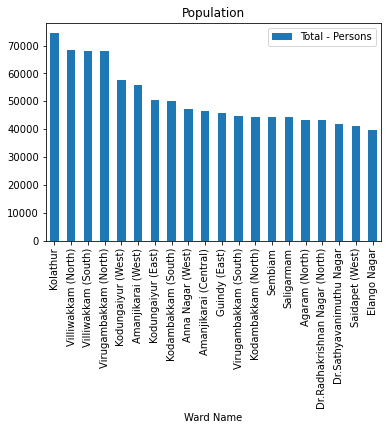

In [9]:
Pop_Ward_df.head(20).plot.bar(x="Ward Name", y="Total - Persons", rot=90, title="Population");

plt.show(block=True)

In [10]:
Target_Areas_df = pd.read_csv('GeoCoordinates.csv', index_col=0)  
Target_Areas_df.head()

,Latitude,Logitude
Neighborhood,,
Kolathur,13.1240°,80.2121°
Villivakkam,13.106741°,80.205638°
Amanjikarai,13.0711489,80.2482362


In [11]:
CLIENT_ID = 'NEFL5KMKMHNBHXXMBXJSMHW0E4UQGOC0MZNC3ZPN5XVH1D4W' 
CLIENT_SECRET = '2NCUE4UBYJJW30HVGLLR4GS4L2JRIL01DNOQJ05AHL2D5BRU' 
FS_HOSPITAL_KEY = "4bf58dd8d48988d196941735"
VERSION = '20200605'

In [12]:
radius=5000
LIMIT=100
lat = 13.116978
lng = 80.212611
search_query = ''
categoryId = '4bf58dd8d48988d104941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT, categoryId)

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5eede140c94979001b25d152'},
 'response': {'venues': [{'id': '4cccf3d8ba79a1cdf6c83ecb',
    'name': 'Madras Medical Mission (MMM Hospital)',
    'location': {'address': '4-A, Dr. J. Jayalalitha Nagar,',
     'crossStreet': 'Mogappair',
     'lat': 13.085985770116054,
     'lng': 80.18739791474096,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.085985770116054,
       'lng': 80.18739791474096}],
     'distance': 4401,
     'postalCode': '600037',
     'cc': 'IN',
     'city': 'Chennai',
     'state': 'Tamil Nadu',
     'country': 'India',
     'formattedAddress': ['4-A, Dr. J. Jayalalitha Nagar, (Mogappair)',
      'Chennai 600037',
      'Tamil Nadu',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary':

In [13]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe

e:\python\miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4cccf3d8ba79a1cdf6c83ecb,Madras Medical Mission (MMM Hospital),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592648039,False,"4-A, Dr. J. Jayalalitha Nagar,",Mogappair,13.085986,80.187398,"[{'label': 'display', 'lat': 13.08598577011605...",4401,600037,IN,Chennai,Tamil Nadu,India,"[4-A, Dr. J. Jayalalitha Nagar, (Mogappair), C..."
1,4f6db126e4b056aa92e14716,Homeocare international,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1592648039,False,NaN,NaN,13.076000,80.220400,"[{'label': 'display', 'lat': 13.076, 'lng': 80...",4639,NaN,IN,NaN,NaN,India,[India]
2,51188649e4b0805e2052ce26,Sundaram Medical Foundation,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592648039,False,New Avadi Road,NaN,13.075769,80.237555,"[{'label': 'display', 'lat': 13.075769, 'lng':...",5325,NaN,IN,NaN,NaN,India,"[New Avadi Road, India]"
3,53834c54498eefac456d7d72,Sooria Multispeciality Dental Clinic,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",v-1592648039,False,NaN,NaN,13.115396,80.241889,"[{'label': 'display', 'lat': 13.115396, 'lng':...",3179,NaN,IN,NaN,NaN,India,[India]
4,4d0ca4cbeea9b60c7c80593f,Vasan Dental Care,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",v-1592648039,False,NaN,NaN,13.091951,80.218289,"[{'label': 'display', 'lat': 13.09195075063557...",2853,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]"
5,513c8794e4b02ba213538817,Dr Shanmugaram's Clinic,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1592648039,False,Shanthi Colony,Anna Nagar,13.082461,80.205401,"[{'label': 'display', 'lat': 13.08246143062018...",3921,NaN,IN,Chennai,Tamil Nadu,India,"[Shanthi Colony (Anna Nagar), Chennai, Tamil N..."
6,50efbd64e4b0ba7513fc9a95,metrohealth clinic,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1592648039,False,NaN,NaN,13.084249,80.226318,"[{'label': 'display', 'lat': 13.08424949645996...",3934,NaN,IN,NaN,NaN,India,[India]
7,5292fc80498e2c42e2b6f29d,Dr. Kamalakannan,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1592648039,False,NaN,NaN,13.112532,80.182660,"[{'label': 'display', 'lat': 13.11253202692579...",3284,NaN,IN,NaN,NaN,India,[India]
8,4ff6938fe4b058e164cf8dd9,soundarapandian,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592648039,False,NaN,NaN,13.083676,80.214851,"[{'label': 'display', 'lat': 13.0836763381958,...",3715,NaN,IN,NaN,NaN,India,[India]
9,50d57f5de4b06651ce7ea47c,K S Hospital,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1592648039,False,NaN,NaN,13.076088,80.235619,"[{'label': 'display', 'lat': 13.07608844741252...",5190,NaN,IN,NaN,NaN,India,[India]


In [14]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Madras Medical Mission (MMM Hospital),Hospital,"4-A, Dr. J. Jayalalitha Nagar,",Mogappair,13.085986,80.187398,"[{'label': 'display', 'lat': 13.08598577011605...",4401,600037,IN,Chennai,Tamil Nadu,India,"[4-A, Dr. J. Jayalalitha Nagar, (Mogappair), C...",4cccf3d8ba79a1cdf6c83ecb
1,Homeocare international,Medical Center,NaN,NaN,13.076000,80.220400,"[{'label': 'display', 'lat': 13.076, 'lng': 80...",4639,NaN,IN,NaN,NaN,India,[India],4f6db126e4b056aa92e14716
2,Sundaram Medical Foundation,Hospital,New Avadi Road,NaN,13.075769,80.237555,"[{'label': 'display', 'lat': 13.075769, 'lng':...",5325,NaN,IN,NaN,NaN,India,"[New Avadi Road, India]",51188649e4b0805e2052ce26
3,Sooria Multispeciality Dental Clinic,Dentist's Office,NaN,NaN,13.115396,80.241889,"[{'label': 'display', 'lat': 13.115396, 'lng':...",3179,NaN,IN,NaN,NaN,India,[India],53834c54498eefac456d7d72
4,Vasan Dental Care,Dentist's Office,NaN,NaN,13.091951,80.218289,"[{'label': 'display', 'lat': 13.09195075063557...",2853,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",4d0ca4cbeea9b60c7c80593f
5,Dr Shanmugaram's Clinic,Doctor's Office,Shanthi Colony,Anna Nagar,13.082461,80.205401,"[{'label': 'display', 'lat': 13.08246143062018...",3921,NaN,IN,Chennai,Tamil Nadu,India,"[Shanthi Colony (Anna Nagar), Chennai, Tamil N...",513c8794e4b02ba213538817
6,metrohealth clinic,Doctor's Office,NaN,NaN,13.084249,80.226318,"[{'label': 'display', 'lat': 13.08424949645996...",3934,NaN,IN,NaN,NaN,India,[India],50efbd64e4b0ba7513fc9a95
7,Dr. Kamalakannan,Doctor's Office,NaN,NaN,13.112532,80.182660,"[{'label': 'display', 'lat': 13.11253202692579...",3284,NaN,IN,NaN,NaN,India,[India],5292fc80498e2c42e2b6f29d
8,soundarapandian,Hospital,NaN,NaN,13.083676,80.214851,"[{'label': 'display', 'lat': 13.0836763381958,...",3715,NaN,IN,NaN,NaN,India,[India],4ff6938fe4b058e164cf8dd9
9,K S Hospital,Medical Center,NaN,NaN,13.076088,80.235619,"[{'label': 'display', 'lat': 13.07608844741252...",5190,NaN,IN,NaN,NaN,India,[India],50d57f5de4b06651ce7ea47c


In [15]:
dataframe_filtered.sort_values(by=['distance'], inplace=True)
dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
36,Southern Railways Hospital,Hospital,NaN,NaN,13.102589,80.232276,"[{'label': 'display', 'lat': 13.10258857305929...",2666,NaN,IN,NaN,NaN,India,[India],4eeace690e01182cafcce857
43,Sarayu family medical center,Hospital,NaN,NaN,13.092287,80.216690,"[{'label': 'display', 'lat': 13.09228706359863...",2783,NaN,IN,NaN,NaN,India,[India],5162ca07e4b0b401f3145f73
16,Aarthi Diagonostoc Center,Medical Center,NaN,NaN,13.091877,80.213199,"[{'label': 'display', 'lat': 13.091877, 'lng':...",2794,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",4eb7310429c212fb6d29d569
10,Sundance Med,Medical Center,NaN,NaN,13.092460,80.206916,"[{'label': 'display', 'lat': 13.09246036718905...",2798,NaN,IN,NaN,NaN,India,[India],5195c559498ef9d417a1af84
4,Vasan Dental Care,Dentist's Office,NaN,NaN,13.091951,80.218289,"[{'label': 'display', 'lat': 13.09195075063557...",2853,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",4d0ca4cbeea9b60c7c80593f
20,Silkee Clinic,Medical Center,NaN,NaN,13.098565,80.193241,"[{'label': 'display', 'lat': 13.09856513176396...",2934,NaN,IN,NaN,NaN,India,[India],50b5cbc1e4b09f5c89963899
3,Sooria Multispeciality Dental Clinic,Dentist's Office,NaN,NaN,13.115396,80.241889,"[{'label': 'display', 'lat': 13.115396, 'lng':...",3179,NaN,IN,NaN,NaN,India,[India],53834c54498eefac456d7d72
35,Lister Metropolis,Medical Lab,NaN,NaN,13.089138,80.219588,"[{'label': 'display', 'lat': 13.089138, 'lng':...",3190,NaN,IN,NaN,NaN,India,[India],51b3d5e5498e624e84588c2f
7,Dr. Kamalakannan,Doctor's Office,NaN,NaN,13.112532,80.182660,"[{'label': 'display', 'lat': 13.11253202692579...",3284,NaN,IN,NaN,NaN,India,[India],5292fc80498e2c42e2b6f29d
40,Dental Solution,Dentist's Office,NaN,NaN,13.093738,80.193862,"[{'label': 'display', 'lat': 13.09373758954559...",3290,NaN,IN,NaN,NaN,India,[India],5062ff74e4b026e5f2458b58


In [16]:
dataframe_filtered1=dataframe_filtered[['name','categories','distance','lat','lng','id']]
dataframe_filtered1

,name,categories,distance,lat,lng,id
36,Southern Railways Hospital,Hospital,2666,13.102589,80.232276,4eeace690e01182cafcce857
43,Sarayu family medical center,Hospital,2783,13.092287,80.216690,5162ca07e4b0b401f3145f73
16,Aarthi Diagonostoc Center,Medical Center,2794,13.091877,80.213199,4eb7310429c212fb6d29d569
10,Sundance Med,Medical Center,2798,13.092460,80.206916,5195c559498ef9d417a1af84
4,Vasan Dental Care,Dentist's Office,2853,13.091951,80.218289,4d0ca4cbeea9b60c7c80593f
20,Silkee Clinic,Medical Center,2934,13.098565,80.193241,50b5cbc1e4b09f5c89963899
3,Sooria Multispeciality Dental Clinic,Dentist's Office,3179,13.115396,80.241889,53834c54498eefac456d7d72
35,Lister Metropolis,Medical Lab,3190,13.089138,80.219588,51b3d5e5498e624e84588c2f
7,Dr. Kamalakannan,Doctor's Office,3284,13.112532,80.182660,5292fc80498e2c42e2b6f29d
40,Dental Solution,Dentist's Office,3290,13.093738,80.193862,5062ff74e4b026e5f2458b58


In [17]:
df1=dataframe_filtered1.groupby('categories').count()
df1

,name,distance,lat,lng,id
categories,,,,,
Alternative Healer,1,1,1,1,1
Dentist's Office,4,4,4,4,4
Doctor's Office,5,5,5,5,5
Emergency Room,1,1,1,1,1
Eye Doctor,1,1,1,1,1
Hospital,22,22,22,22,22
Medical Center,9,9,9,9,9
Medical Lab,1,1,1,1,1
Veterinarian,1,1,1,1,1


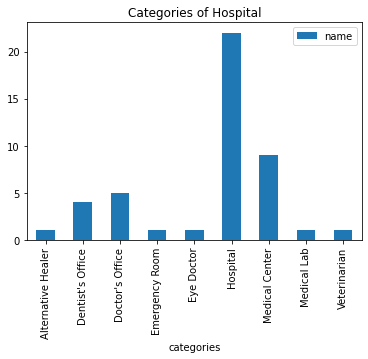

In [18]:
df1.plot.bar(y='name', title="Categories of Hospital" )
plt.show(block=True)

In [19]:
dataframe_filtered1 = dataframe_filtered1[dataframe_filtered1['categories'] == "Hospital"]
dataframe_filtered1['distance_rank'] = dataframe_filtered1['distance'].rank(ascending=1)
dataframe_filtered1 = dataframe_filtered1.set_index('distance_rank')
dataframe_filtered1 = dataframe_filtered1.iloc[2:]
dataframe_filtered1 = dataframe_filtered1.reset_index('distance_rank')
dataframe_filtered2 = dataframe_filtered1.iloc[0:9]
dataframe_filtered3 = dataframe_filtered1.iloc[11:]
dataframe_filtered2

e:\python\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,distance_rank,name,categories,distance,lat,lng,id
0,3.0,Sridevi Hospitals,Hospital,3508,13.088418,80.198918,4d5769fdafe4b60cb0934461
1,4.0,soundarapandian,Hospital,3715,13.083676,80.214851,4ff6938fe4b058e164cf8dd9
2,5.0,Apollo Medical Centre,Hospital,3744,13.084527,80.221720,58a11a11fc73d453c2995729
3,6.0,Ashwin Clinic,Hospital,3875,13.082277,80.215457,5604e217498e96c19e4ae389
4,7.0,Sundaram Medical Foundation OP Services,Hospital,3938,13.081995,80.207172,4f06ef92e4b0ad9c23935a9c
5,8.0,km hospital,Hospital,4298,13.088939,80.239872,528e21cc11d2871318e3852b
6,9.5,Madras Medical Mission (MMM Hospital),Hospital,4401,13.085986,80.187398,4cccf3d8ba79a1cdf6c83ecb
7,9.5,physiotherapy clinic,Hospital,4401,13.089308,80.241615,528e1a2511d279f7d736786f
8,11.0,Frontier Lifeline Hospital,Hospital,4448,13.087158,80.185292,519b1365498e484c03997d3a


In [20]:
dataframe_filtered3

,distance_rank,name,categories,distance,lat,lng,id
11,14.0,Billroth Hospital,Hospital,4866,13.075775,80.227608,4d5e8c19b19fa1437519dbc8
12,15.0,Lifeline Hospital,Hospital,4985,13.078071,80.235380,4f5affb6e4b0a3bd2237eddc
13,16.0,Dr V Seshiah Diabetes Research Institute,Hospital,5078,13.074618,80.230003,4edd64a929c2b9122c01b164
14,17.0,Sundaram Medical Foundation,Hospital,5325,13.075769,80.237555,51188649e4b0805e2052ce26
15,18.0,Yajur Med House,Hospital,5367,13.070742,80.226658,4da46cc87ccc816ea139917b
16,19.0,V.k Hospital (24Hrs),Hospital,5421,13.097303,80.258350,59a7024dd1a40225cfcc2498
17,20.0,Prashanth Hospital,Hospital,5863,13.069472,80.235962,4cc1b850668db60c639c15b4
18,21.0,Prashanth Hospitals,Hospital,5890,13.069506,80.236605,52eb9a2e498e8924c04e3048
19,22.0,Chennai Plastic Surgery,Hospital,5936,13.071421,80.241074,51790aafe4b022af55dba6da


In [21]:
venues_map = folium.Map(location=[lat, lng], zoom_start=12)

# add a red circle marker to represent the Amanjikarai
folium.CircleMarker(
    [lat, lng],
    radius=10,
    color='red',
    popup='Kolathur',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered3.lat, dataframe_filtered3.lng, dataframe_filtered3.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [22]:
for row in dataframe_filtered2['id']:
    venue_id = row
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id,CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    venue_data = results['response']['venue']
    print("Hospital Name", venue_data['name'])
    print("Contact", venue_data['contact'])
    print("Address", venue_data['location']['formattedAddress'])
    print("Likes" , venue_data['likes']['count'])
    print("Tips ",venue_data['tips']['count'])


Hospital Name Sridevi Hospitals
Contact {}
Address ['Chennai', 'Tamil Nadu', 'India']
Likes 0
Tips  0
Hospital Name soundarapandian
Contact {}
Address ['India']
Likes 0
Tips  0
Hospital Name Apollo Medical Centre
Contact {}
Address ['India']
Likes 1
Tips  0
Hospital Name Ashwin Clinic
Contact {}
Address ['India']
Likes 0
Tips  0
Hospital Name Sundaram Medical Foundation OP Services
Contact {}
Address ['Chennai', 'Tamil Nadu', 'India']
Likes 0
Tips  1
Hospital Name km hospital
Contact {}
Address ['India']
Likes 0
Tips  0
Hospital Name Madras Medical Mission (MMM Hospital)
Contact {'phone': '+914426565961', 'formattedPhone': '+91 44 2656 5961'}
Address ['4-A, Dr. J. Jayalalitha Nagar, (Mogappair)', 'Chennai 600037', 'Tamil Nadu', 'India']
Likes 2
Tips  4
Hospital Name physiotherapy clinic
Contact {}
Address ['India']
Likes 0
Tips  0
Hospital Name Frontier Lifeline Hospital
Contact {}
Address ['India']
Likes 0
Tips  0
